#Task

The accelerometer data from the mobile phone needs to be classified to determine the activity being performed by a person: walking, standing, running, or walking upstairs/downstairs.

Utilize the SVM and Random Forest algorithms from the scikit-learn library. As features, you can use accelerometer measurements. However, to improve algorithm performance, start by preparing the dataset and calculating time domain features. More about these features are described in this article.

Compare the performance results of both algorithms on different features and different models.

In [1]:
import os
import time
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Reading tables and creating a shared DataFrame.

In [3]:
data_folder = '/content/drive/MyDrive/data'

all_data = pd.DataFrame()

for activity_folder in os.listdir(data_folder):
    activity_path = os.path.join(data_folder, activity_folder)
    if not os.path.isdir(activity_path):
        continue

    for file_name in os.listdir(activity_path):
        file_path = os.path.join(activity_path, file_name)
        if not file_name.endswith('.csv'):
            continue

        df = pd.read_csv(file_path)

        df['activity'] = activity_folder

        all_data = all_data.append(df, ignore_index=True)

all_data = all_data.sample(frac=1).reset_index(drop=True)

X = all_data.drop('activity', axis=1)
y = all_data['activity']

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-3-3657acc5e5ac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-3-3657acc5e5ac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-3-3657acc5e5ac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-3-3657acc5e5ac>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-3-3657acc5e5ac>:19: FutureWarning: Th

2. Splitting into training and testing sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Temporal features.

In [5]:
X_train['time_mean'] = X_train.mean(axis=1)
X_test['time_mean'] = X_test.mean(axis=1)

4. Classification.

In [6]:
svm_model = SVC()
rf_model = RandomForestClassifier()

5. Model training.

In [7]:
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
svm_training_time = end_time - start_time

In [8]:
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
rf_training_time = end_time - start_time

6. Making predictions on the test data.

In [9]:
svm_pred = svm_model.predict(X_test)

In [10]:
rf_pred = rf_model.predict(X_test)

7. Evaluation of results

In [11]:
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Accuracy (SVM):", svm_accuracy)
print("Accuracy (Random Forest):", rf_accuracy)

Accuracy (SVM): 0.8941762096358197
Accuracy (Random Forest): 0.9997420819147839


In [13]:
print("Time taken for SVM training:", svm_training_time, "seconds")
print("Time taken for Random Forest training:", rf_training_time, "seconds")

Time taken for SVM training: 438.89962673187256 seconds
Time taken for Random Forest training: 24.707149505615234 seconds


In [14]:
svm_report = classification_report(y_test, svm_pred)
print("SVM Results:")
print(svm_report)

rf_report = classification_report(y_test, rf_pred)
print("Random Forest Results:")
print(rf_report)

SVM Results:
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      6220
     running       0.93      0.90      0.92     20376
      stairs       1.00      0.00      0.01       988
     walking       0.80      0.91      0.85     11188

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772

Random Forest Results:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6220
     running       1.00      1.00      1.00     20376
      stairs       1.00      0.99      1.00       988
     walking       1.00      1.00      1.00     11188

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



## __Conclusions:__
Based on the provided results and timing measurements, the following conclusions can be drawn:

__Training Time:__

*   The Random Forest model trains significantly faster, taking only 24.71 seconds compared to the SVM model, which requires approximately 438.90 seconds. This indicates that Random Forest is more efficient in terms of training speed.

__Classification Report:__


*   The Random Forest model exhibits very high accuracy in the classification report, with an accuracy score of 1.00 for all classes. This means the model correctly classifies all examples.
*   On the other hand, the SVM model has lower accuracy, indicating potential challenges in distinguishing certain classes. The 'stairs' class has low precision, recall, and f1-score, which may be due to a limited amount of data for this class.



__Overall Conclusion:__

The Random Forest model emerges as the winner in this comparison. It not only achieves impressive accuracy and reliable metrics in the classification report but also trains noticeably faster compared to the SVM model.

In [15]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

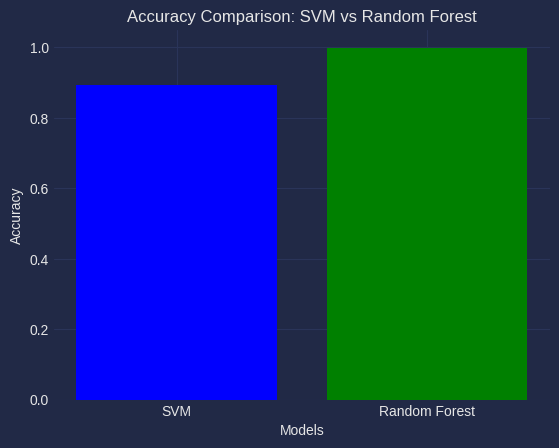

In [16]:
accuracies = [svm_accuracy, rf_accuracy]
models = ['SVM', 'Random Forest']
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM vs Random Forest')
plt.show()